## (1) Import the necessary libraries 

In [56]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## (2) Read the data as a data frame 

In [2]:
df_Insurance = pd.read_csv(r"C:\Users\shrut\Desktop\Maersk_Case_Study\insurance.csv")

## (3a) Shape of the data 

In [4]:
df_Insurance.shape

(1338, 7)

In [50]:
#To display the first ten dataset
df_Insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## (3b) Data type of each attribute 

In [64]:
df_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 123.6 KB


In [63]:
#Conversion of sex,smoker and region datatype
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()   
df_Insurance['sex']= label_encoder.fit_transform(df_Insurance['sex'])   
df_Insurance['smoker']= label_encoder.fit_transform(df_Insurance['smoker'])   
df_Insurance['region']= label_encoder.fit_transform(df_Insurance['region'])   

## (3c) Checking the presence of missing values 

In [6]:
df_Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#To check whether their is duplicate value/values or not
df_Insurance.duplicated().sum()

1

In [8]:
#If there is a duplicate value then we'll truncate that value
df_Insurance.drop_duplicates(inplace = True)
df_Insurance.duplicated().sum()

0

## (3d) 5 point summary of numerical attributes 

In [67]:
df_Insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## (3e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

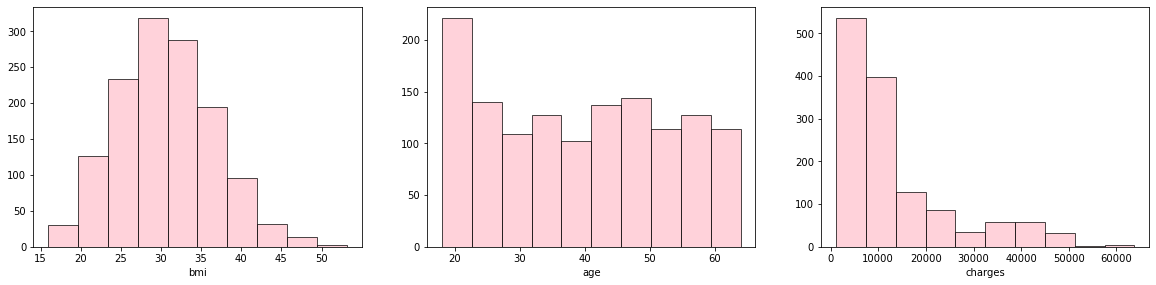

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_Insurance.bmi, color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df_Insurance.age, color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df_Insurance.charges, color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

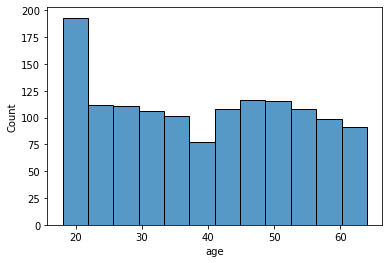

In [11]:
sns.histplot(df_Insurance['age'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

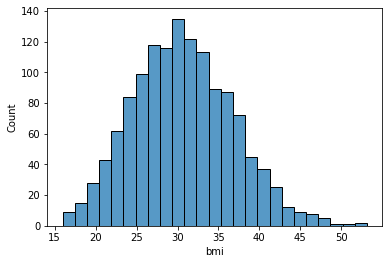

In [12]:
sns.histplot(df_Insurance['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

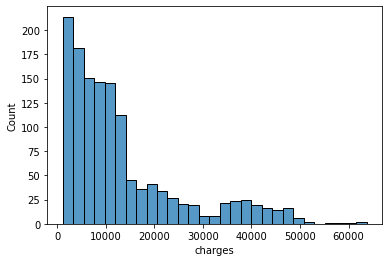

In [13]:
sns.histplot(df_Insurance['charges'])

## (3f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [14]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_Insurance.bmi),stats.skew(df_Insurance.age),
                                       stats.skew(df_Insurance.charges)]},index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283596
age,0.054719
charges,1.513690


## (3g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

In [19]:
#Finding outliers through python code
iqr = np.subtract(*np.percentile(df_Insurance['charges'], [75, 25]))
print(iqr)

11911.37345


In [20]:
#Identifying outliers for charges
q25, q75 = np.percentile(df_Insurance['charges'], 25), np.percentile(df_Insurance['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['charges'] if x < lower or x > upper]
print('Identified outliers for charges out of 1138: %d' % len(outliers))

Identified outliers for charges out of 1138: 139


In [21]:
#Identify outliers for bmi
q25, q75 = np.percentile(df_Insurance['bmi'], 25), np.percentile(df_Insurance['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['bmi'] if x < lower or x > upper]
print('Identified outliers for bmi out of 1338 records: %d' % len(outliers))

Identified outliers for bmi out of 1338 records: 9


In [22]:
#Identify outliers for age
q25, q75 = np.percentile(df_Insurance['age'], 25), np.percentile(df_Insurance['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['age'] if x < lower or x > upper]
print('Identified outliers for age out of 1338 records: %d' % len(outliers))

Identified outliers for age out of 1338 records: 0


## (3h) Distribution of categorical columns (include children) 

<AxesSubplot:xlabel='children', ylabel='charges'>

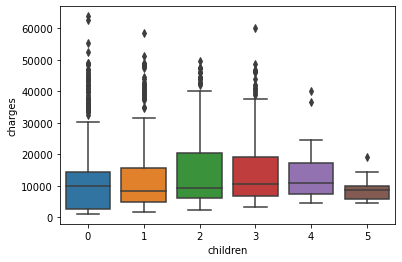

In [23]:
#Bivariate
sns.boxplot(x='children', y='charges', data= df_Insurance)

<AxesSubplot:xlabel='sex', ylabel='charges'>

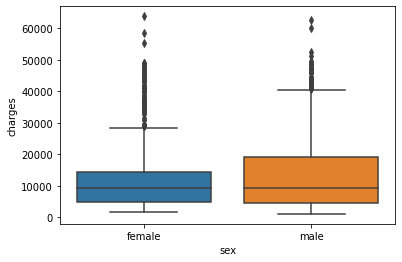

In [24]:
sns.boxplot(x='sex', y='charges', data= df_Insurance)

<AxesSubplot:xlabel='region', ylabel='charges'>

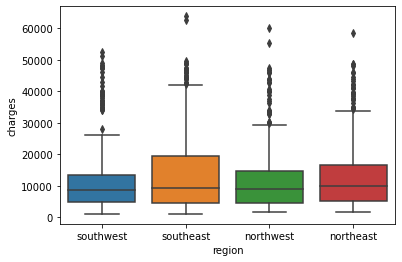

In [25]:
sns.boxplot(x='region', y='charges', data= df_Insurance)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

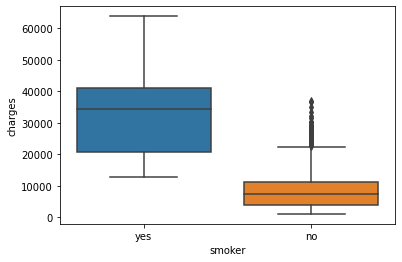

In [26]:
sns.boxplot(x='smoker', y='charges', data= df_Insurance)

<AxesSubplot:xlabel='children', ylabel='count'>

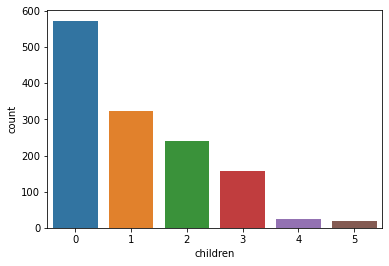

In [45]:
#Univariate
sns.countplot(df_Insurance['children'])

<AxesSubplot:xlabel='sex', ylabel='count'>

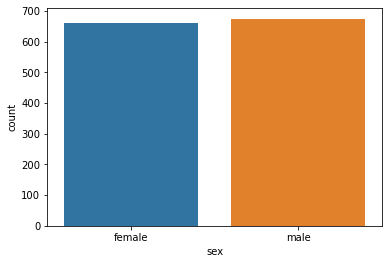

In [46]:
sns.countplot(df_Insurance['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

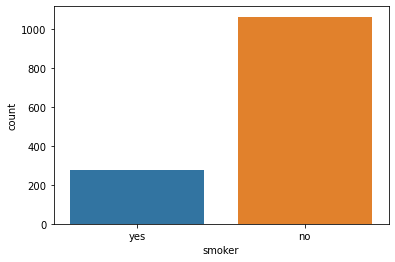

In [47]:
sns.countplot(df_Insurance['smoker'])

In [ ]:
The count of non-smokers is quite high than the smokers in the sample.

<AxesSubplot:xlabel='smoker', ylabel='count'>

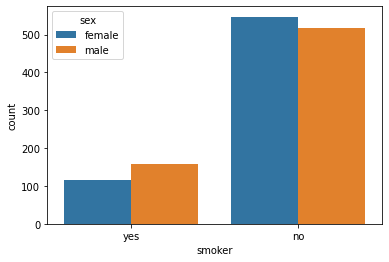

In [48]:
sns.countplot(df_Insurance['smoker'],hue = df_Insurance['sex'])

<AxesSubplot:xlabel='region', ylabel='count'>

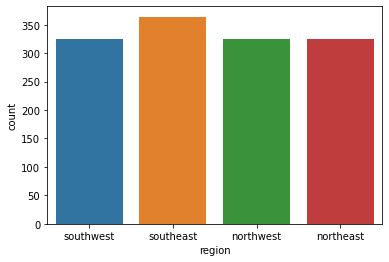

In [49]:
sns.countplot(df_Insurance['region'])

## (3i) Pair plot that includes all the columns of the data frame 

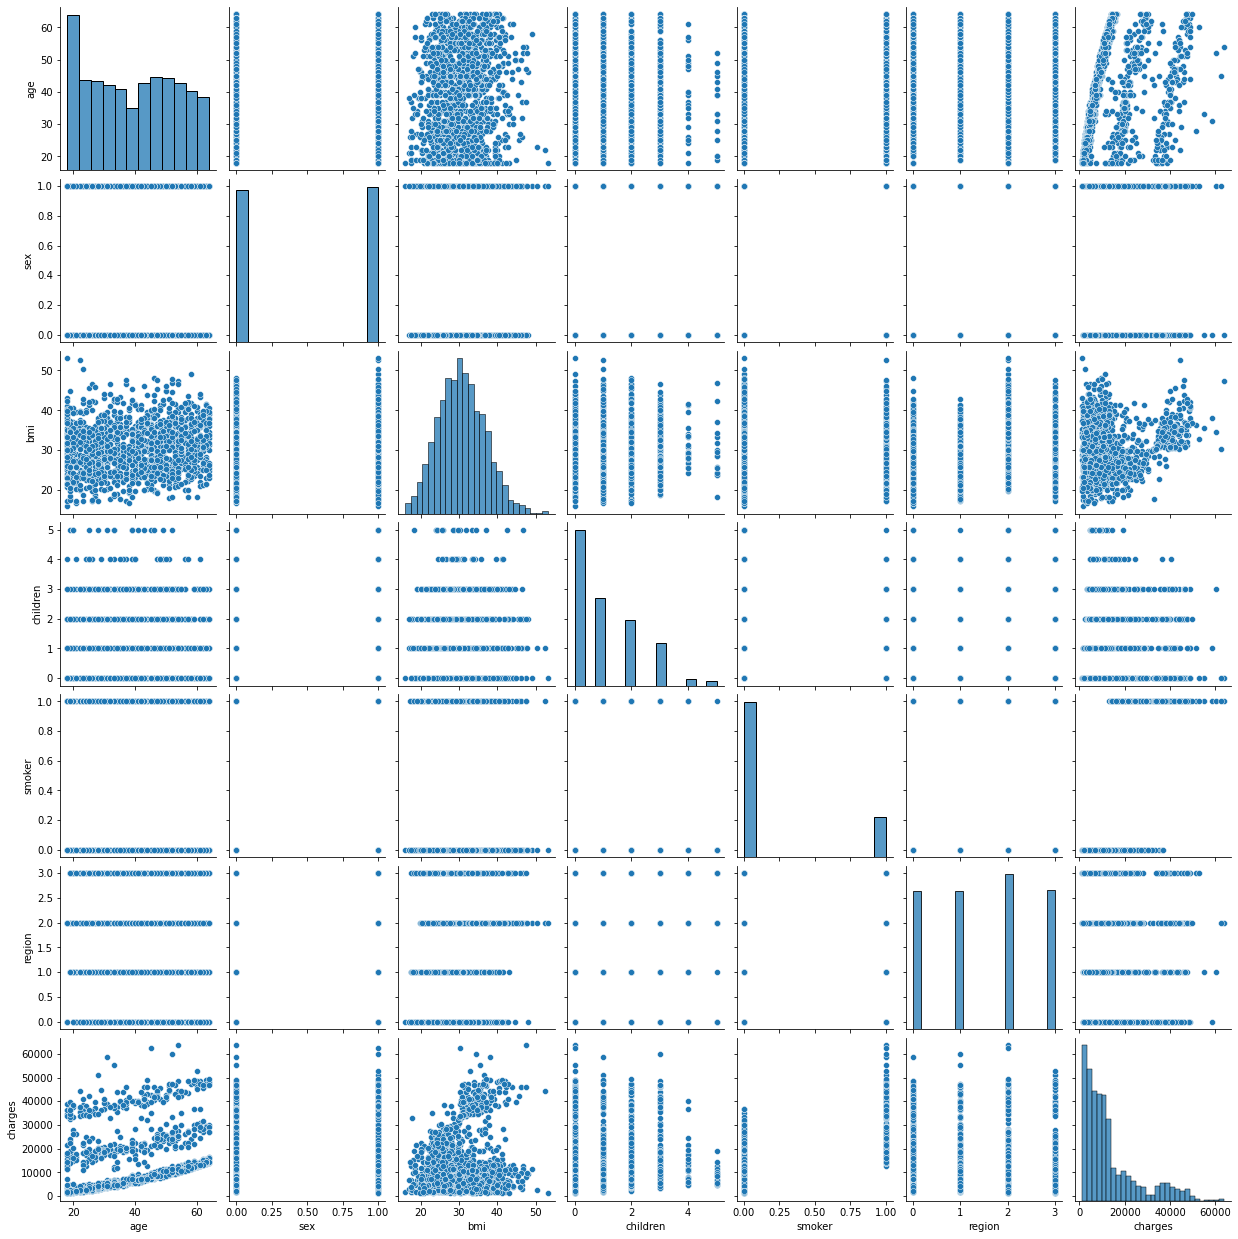

In [33]:
insurance_df_encoded = copy.deepcopy(df_Insurance)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = df_Insurance.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

## (4a) Do charges of people who smoke differ significantly from the people who don't? 

In [35]:
df_Insurance.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

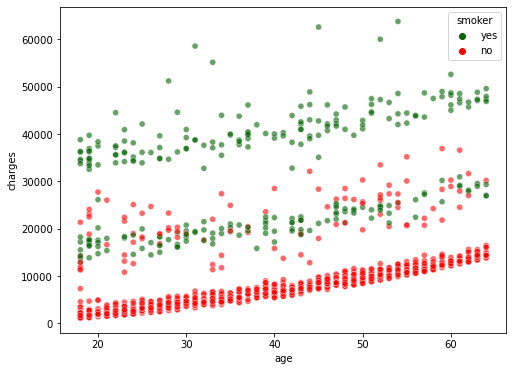

In [36]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges,hue=df_Insurance.smoker,palette= ['darkgreen','red'] ,alpha=0.6)
plt.show()

In [38]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(df_Insurance[df_Insurance.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers as an array
y = np.array(df_Insurance[df_Insurance.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

1.4067220949376498e-282


## (4b) Does bmi of males differ significantly from that of females? 

In [39]:
df_Insurance.sex.value_counts() 

male      675
female    662
Name: sex, dtype: int64

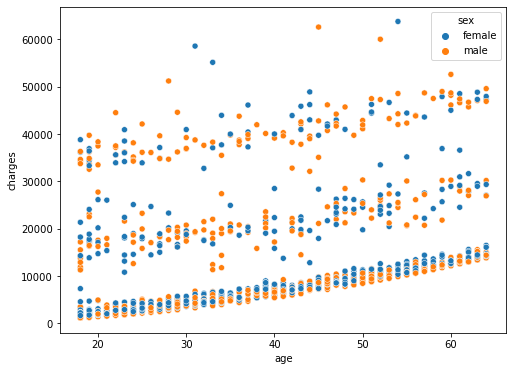

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges,hue=df_Insurance.sex  )
plt.show()


In [41]:
#Check dependency of bmi on gender and performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(df_Insurance[df_Insurance.sex == 'male'].bmi)  
y = np.array(df_Insurance[df_Insurance.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08991704324931137


## (4c) Is the proportion of smokers significantly different in different genders? 

In [42]:
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(df_Insurance['sex'],df_Insurance['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.0062765550120107375


## (4d) . Is the distribution of bmi across women with no children, one child and two children, the same?

In [43]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df = copy.deepcopy(df_Insurance[df_Insurance['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841
